In [2]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = ResourceWarning)
warnings.filterwarnings('ignore', category = BytesWarning)

import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.collections import LineCollection

import datetime, time, os, sys

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [3]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [4]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33883,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://10.6.124.72:42019,Total threads: 4
Dashboard: /proxy/39149/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:38429,


In [5]:
db = '/scratch/x77/db6174/access-om2/archive/databases/1deg_jra55_ryf/cc_database_nostress.db'
session_cont = cc.database.create_session(db)

db = '/scratch/x77/db6174/access-om2/archive/databases/1deg_jra55_ryf/cc_database_vary_KPP.db'
session_vary_KPP = cc.database.create_session(db)

db = '/scratch/x77/db6174/access-om2/archive/databases/1deg_jra55_ryf/cc_database_vary_rlds.db'
session_vary_rlds = cc.database.create_session(db)

expt = ['1deg_jra55_ryf_param_KPP', '1deg_jra55_ryf_vary_KPP', '1deg_jra55_ryf_vary_rlds']
session = [session_cont, session_vary_KPP, session_vary_rlds]
name = ['Control', 'Vary_KPP', 'Vary_rlds']

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


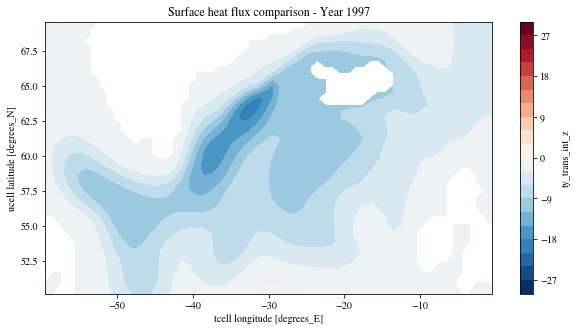

In [32]:
nframes = 20
startframe = 1
frames_plot = []
nt = 0
rho0 = 1025

fig = plt.figure(1,figsize=(10, 5))

start_time = '1900-01-01'
end_time = '1999-12-31'

year = 1900

time = cc.querying.getvar(expt = expt[0], session = session[0], variable = 'ty_trans_int_z', frequency = '1 monthly').time

def updatefig(nt):
    plt.clf()
    currentframe = startframe + nt
    year = 1900 + nt*5 + 2
    start = nt * 12 * 5
    end = (nt + 1) * 12 * 5 - 1
    #day = np.mod(currentframe-1,365)+1
    ty_trans = cc.querying.getvar(expt = expt[0], session = session[0], variable = 'ty_trans_int_z', frequency = '1 monthly').sel(
        time = slice(time[start], time[end]))
    ty_basin = ty_trans.sel(xt_ocean = slice(-100, 10)).sel(yu_ocean = slice(10, 70))
    psi_basin = ty_basin.cumsum('xt_ocean').where(abs(ty_basin<=1.e20))/(rho0*1.e6)

    fig = plt.figure(1, figsize=(10, 5))
    p1 = psi_basin.sel(xt_ocean = slice(-60, 0)).sel(yu_ocean = slice(50, 70)).mean('time').plot.contourf(levels = np.linspace(-30, 30, 21))
    plt.title('Surface heat flux comparison - Year %4d' % year)

    filestr = '/home/156/db6174/x77/1deg_test_runs/Vary_rlds/Animations/NA_subpolar/Figures/image_%4d.png' % nt
    plt.savefig(filestr, dpi = 300)
    print(nt)
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval=1, blit=False)
metadata = dict(title='North Atlantic subpolar gyre', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=4, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('Animations/NA_subpolar_gyre_control.m4v', writer=ffwriter)

plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


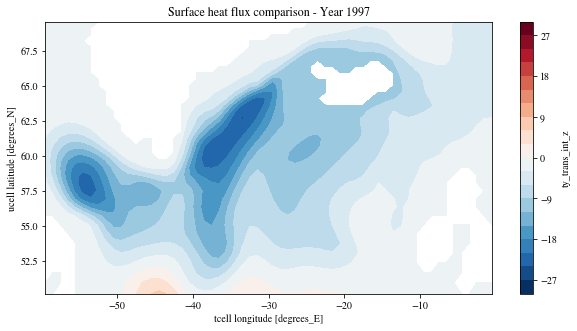

In [33]:
nframes = 20
startframe = 1
frames_plot = []
nt = 0
rho0 = 1025

fig = plt.figure(1,figsize=(10, 5))

start_time = '1900-01-01'
end_time = '1999-12-31'

year = 1900

time = cc.querying.getvar(expt = expt[1], session = session[1], variable = 'ty_trans_int_z', frequency = '1 monthly').time

def updatefig(nt):
    plt.clf()
    currentframe = startframe + nt
    year = 1900 + nt*5 + 2
    start = nt * 12 * 5
    end = (nt + 1) * 12 * 5 - 1
    #day = np.mod(currentframe-1,365)+1
    ty_trans = cc.querying.getvar(expt = expt[1], session = session[1], variable = 'ty_trans_int_z', frequency = '1 monthly').sel(
        time = slice(time[start], time[end]))
    ty_basin = ty_trans.sel(xt_ocean = slice(-100, 10)).sel(yu_ocean = slice(10, 70))
    psi_basin = ty_basin.cumsum('xt_ocean').where(abs(ty_basin<=1.e20))/(rho0*1.e6)

    fig = plt.figure(1, figsize=(10, 5))
    p1 = psi_basin.sel(xt_ocean = slice(-60, 0)).sel(yu_ocean = slice(50, 70)).mean('time').plot.contourf(levels = np.linspace(-30, 30, 21))
    plt.title('Surface heat flux comparison - Year %4d' % year)

    filestr = '/home/156/db6174/x77/1deg_test_runs/Vary_rlds/Animations/NA_subpolar/Figures/image_%4d.png' % nt
    plt.savefig(filestr, dpi = 300)
    print(nt)
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval=1, blit=False)
metadata = dict(title='North Atlantic subpolar gyre', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=4, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('Animations/NA_subpolar_gyre_varyKPP.m4v', writer=ffwriter)

plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


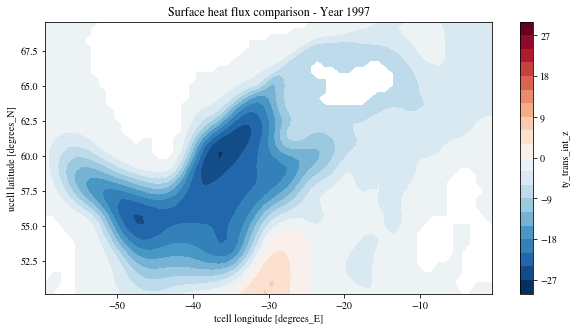

In [34]:
nframes = 20
startframe = 1
frames_plot = []
nt = 0
rho0 = 1025

fig = plt.figure(1,figsize=(10, 5))

start_time = '1900-01-01'
end_time = '1999-12-31'

year = 1900

time = cc.querying.getvar(expt = expt[2], session = session[2], variable = 'ty_trans_int_z', frequency = '1 monthly').time

def updatefig(nt):
    plt.clf()
    currentframe = startframe + nt
    year = 1900 + nt*5 + 2
    start = nt * 12 * 5
    end = (nt + 1) * 12 * 5 - 1
    #day = np.mod(currentframe-1,365)+1
    ty_trans = cc.querying.getvar(expt = expt[2], session = session[2], variable = 'ty_trans_int_z', frequency = '1 monthly').sel(
        time = slice(time[start], time[end]))
    ty_basin = ty_trans.sel(xt_ocean = slice(-100, 10)).sel(yu_ocean = slice(10, 70))
    psi_basin = ty_basin.cumsum('xt_ocean').where(abs(ty_basin<=1.e20))/(rho0*1.e6)

    fig = plt.figure(1, figsize=(10, 5))
    p1 = psi_basin.sel(xt_ocean = slice(-60, 0)).sel(yu_ocean = slice(50, 70)).mean('time').plot.contourf(levels = np.linspace(-30, 30, 21))
    plt.title('Surface heat flux comparison - Year %4d' % year)

    filestr = '/home/156/db6174/x77/1deg_test_runs/Vary_rlds/Animations/NA_subpolar/Figures/image_%4d.png' % nt
    plt.savefig(filestr, dpi = 300)
    print(nt)
    return p1
    
anim = animation.FuncAnimation(fig, updatefig, frames=nframes, interval=1, blit=False)
metadata = dict(title='North Atlantic subpolar gyre', artist='GFD ANU',comment='Animation made using matplotlib and ffmpeg')
ffwriter = animation.FFMpegWriter(fps=4, codec='libx264', bitrate=4000, extra_args=['-pix_fmt','yuv420p'], metadata=metadata)
anim.save('Animations/NA_subpolar_gyre_vary_rlds.m4v', writer=ffwriter)

plt.show()